In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as plio
plio.templates
import plotly.graph_objs as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from xgboost import XGBRegressor
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
filterwarnings(action='ignore')

### 2. Reading the dataset using the read_csv() function of the pandas module

In [4]:
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")  #This argument helps avoid UnicodeDecodeError if the file contains special characters that are not supported by the default encoding (UTF-8).
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
# Adding a new column flight_day_num to the dataset using the existing flight_day column of the dataset
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day_num"] = data["flight_day"].map(mapping)

In [10]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_num
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560,3.814420
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643,1.992792
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000,1.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000,2.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000,4.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000,5.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000,7.000000


In [9]:
data['num_passengers'].value_counts()
#The most common booking involves 1 passenger , occurring 31,352 times .

,count
num_passengers,
1,31352
2,12804
3,2941
4,1784
5,561
6,289
7,114
8,89
9,66


In [10]:
# Get value counts
value_counts = data['num_passengers'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Number of Passengers', 'Count']

# Define different colors for each bar
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Number of Passengers', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Number of Passengers with count of each',
             color='Number of Passengers',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)
# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Number of Passengers'], ticktext=value_counts['Number of Passengers']),
    showlegend=False
)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Show the plot
fig.show()

In [11]:
# Create a pie plot
fig = px.pie(value_counts, names='Number of Passengers', values='Count',
             title='Pie Plot for Number of Passengers',
             width=800, height=500)

# Show the plot
fig.show()

In [12]:
data['sales_channel'].value_counts()

,count
sales_channel,
Internet,44382
Mobile,5618


In [13]:
import plotly.express as px

# Get value counts and rename columns
value_counts = data['sales_channel'].value_counts().reset_index()
value_counts.columns = ['Sales Channel', 'Count']

# Define custom colors: teal and red
colors = ['teal', 'red']

# Create the bar plot with custom colors
fig = px.bar(
    value_counts,
    x='Sales Channel',
    y='Count',
    text='Count',
    labels={'Count': 'Frequency'},
    title='Bar Plot for Sales Channel with count of each sales channel',
    color='Sales Channel',
    color_discrete_sequence=colors,  # Use your custom colors
    width=800,
    height=500
)

# Customize layout
fig.update_layout(showlegend=False)

# Ensure all categories are shown on x-axis
fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=value_counts['Sales Channel'],
        ticktext=value_counts['Sales Channel']
    ),
    showlegend=False
)

# Show the plot
fig.show()

In [14]:
# Create a pie plot
fig = px.pie(value_counts, names='Sales Channel', values='Count',
             title='Pie Plot for Sales Channel',
             width=800, height=500)

# Show the plot
fig.show()

In [15]:
data['trip_type'].value_counts()

,count
trip_type,
RoundTrip,49497
OneWay,387
CircleTrip,116


In [16]:
# Get value counts
value_counts = data['trip_type'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Trip Type', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Trip Type', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Trip Type with count of each trip type ',
             color='Trip Type',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Trip Type'], ticktext=value_counts['Trip Type']),
    showlegend=False
)

# Show the plot
fig.show()

In [17]:
# Create a pie plot
fig = px.pie(value_counts, names='Trip Type', values='Count',
             title='Pie Plot for Trip Type',
             width=800, height=500)

# Show the plot
fig.show()

In [18]:
data['length_of_stay'].value_counts().head(20)

,count
length_of_stay,
6,7757
5,7286
4,5655
3,2839
17,1849
21,1392
18,1356
20,1285
22,1285


In [19]:
# Get value counts
value_counts = data['length_of_stay'].value_counts().head(20).reset_index()

# Rename columns for clarity
value_counts.columns = ['Length of stay', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Length of stay', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Top - 20 Length of stay ',
             color='Length of stay',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Length of stay'], ticktext=value_counts['Length of stay']),
    showlegend=False
)

# Show the plot
fig.show()

In [20]:
# Create a pie plot
fig = px.pie(value_counts, names='Length of stay', values='Count',
             title='Pie Plot for Top - 20 Length of stay',
             width=800, height=500)

# Show the plot
fig.show()

In [21]:
data['flight_hour'].value_counts()

,count
flight_hour,
8,3165
12,3163
9,3132
7,3126
11,3110
13,3101
10,3085
6,3050
5,2851


In [22]:
# Get value counts
value_counts = data['flight_hour'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Flight Hour', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Flight Hour', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Flight Hour',
             color='Flight Hour',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Flight Hour'], ticktext=value_counts['Flight Hour']),
    showlegend=False
)

# Show the plot
fig.show()

In [23]:
# Create a pie plot
fig = px.pie(value_counts, names='Flight Hour', values='Count',
             title='Pie Plot for Flight Hour',
             width=800, height=500)

# Show the plot
fig.show()

In [24]:
data['flight_day'].value_counts()

,count
flight_day,
Mon,8102
Wed,7674
Tue,7673
Thu,7424
Fri,6761
Sun,6554
Sat,5812


In [25]:
# Get value counts
value_counts = data['flight_day'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Flight Day', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Flight Day', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Flight Day',
             color='Flight Day',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Flight Day'], ticktext=value_counts['Flight Day']),
    showlegend=False
)

# Show the plot
fig.show()

In [26]:
# Create a pie plot
fig = px.pie(value_counts, names='Flight Day', values='Count',
             title='Pie Plot for Flight Day',
             width=800, height=500)

# Show the plot
fig.show()

In [27]:
data['route'].value_counts()

,count
route,
AKLKUL,2680
PENTPE,924
MELSGN,842
ICNSIN,801
DMKKIX,744
...,...
HKTJED,1
KBRWUH,1
KTMTWU,1


In [28]:
# Get value counts
value_counts = data['route'].value_counts().head(20).reset_index()

# Rename columns for clarity
value_counts.columns = ['Route', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Route', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Top - 20 Routes taken',
             color='Route',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Route'], ticktext=value_counts['Route']),
    showlegend=False
)

# Show the plot
fig.show()

In [29]:
# Create a pie plot
fig = px.pie(value_counts, names='Route', values='Count',
             title='Pie Plot for Top - 20 Routes taken',
             width=800, height=500)

# Show the plot
fig.show()

In [30]:
data['booking_origin'].value_counts()

,count
booking_origin,
Australia,17872
Malaysia,7174
South Korea,4559
Japan,3885
China,3387
...,...
Ghana,1
Gibraltar,1
Guatemala,1


In [31]:
# Get value counts
value_counts = data['booking_origin'].value_counts().head(20).reset_index()

# Rename columns for clarity
value_counts.columns = ['Booking Origin', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Booking Origin', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Top - 20 Booking Origin',
             color='Booking Origin',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Booking Origin'], ticktext=value_counts['Booking Origin']),
    showlegend=False
)

# Show the plot
fig.show()

In [32]:
# Create a pie plot
fig = px.pie(value_counts, names='Booking Origin', values='Count',
             title='Pie Plot for Top - 20 Booking Origin',
             width=800, height=500)

# Show the plot
fig.show()

In [33]:
data['wants_extra_baggage'].value_counts()

,count
wants_extra_baggage,
1,33439
0,16561


In [34]:
# Get value counts
value_counts = data['wants_extra_baggage'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Extra Baggage', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Extra Baggage', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Extra Baggage(0-> No, 1->Yes)',
             color='Extra Baggage',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Extra Baggage'], ticktext=value_counts['Extra Baggage']),
    showlegend=False
)

# Show the plot
fig.show()

In [35]:
# Create a pie plot
fig = px.pie(value_counts, names='Extra Baggage', values='Count',
             title='Pie Plot for Extra Baggage (0-> No, 1-> Yes)',
             width=800, height=500)

# Show the plot
fig.show()

In [36]:
data['wants_preferred_seat'].value_counts()

,count
wants_preferred_seat,
0,35152
1,14848


In [37]:
# Get value counts
value_counts = data['wants_preferred_seat'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Preferred Seat', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Preferred Seat', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Preferred Seat(0-> No, 1->Yes)',
             color='Preferred Seat',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Preferred Seat'], ticktext=value_counts['Preferred Seat']),
    showlegend=False
)

# Show the plot
fig.show()

In [38]:
# Create a pie plot
fig = px.pie(value_counts, names='Preferred Seat', values='Count',
             title='Pie Plot for Preferred Seat (0-> No, 1-> Yes)',
             width=800, height=500)

# Show the plot
fig.show()

In [39]:
data['wants_in_flight_meals'].value_counts()

,count
wants_in_flight_meals,
0,28643
1,21357


In [40]:
# Get value counts
value_counts = data['wants_in_flight_meals'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Inflight meals', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Inflight meals', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Inflight meals(0-> No, 1->Yes)',
             color='Inflight meals',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Inflight meals'], ticktext=value_counts['Inflight meals']),
    showlegend=False
)

# Show the plot
fig.show()

In [41]:
# Create a pie plot
fig = px.pie(value_counts, names='Inflight meals', values='Count',
             title='Pie Plot for Inflight meals (0-> No, 1-> Yes)',
             width=800, height=500)

# Show the plot
fig.show()

In [42]:
data.flight_duration.value_counts()

,count
flight_duration,
8.83,14520
8.58,6965
5.62,5524
6.62,4721
7.00,3374
7.57,2835
4.67,2743
6.42,1737
5.33,1554


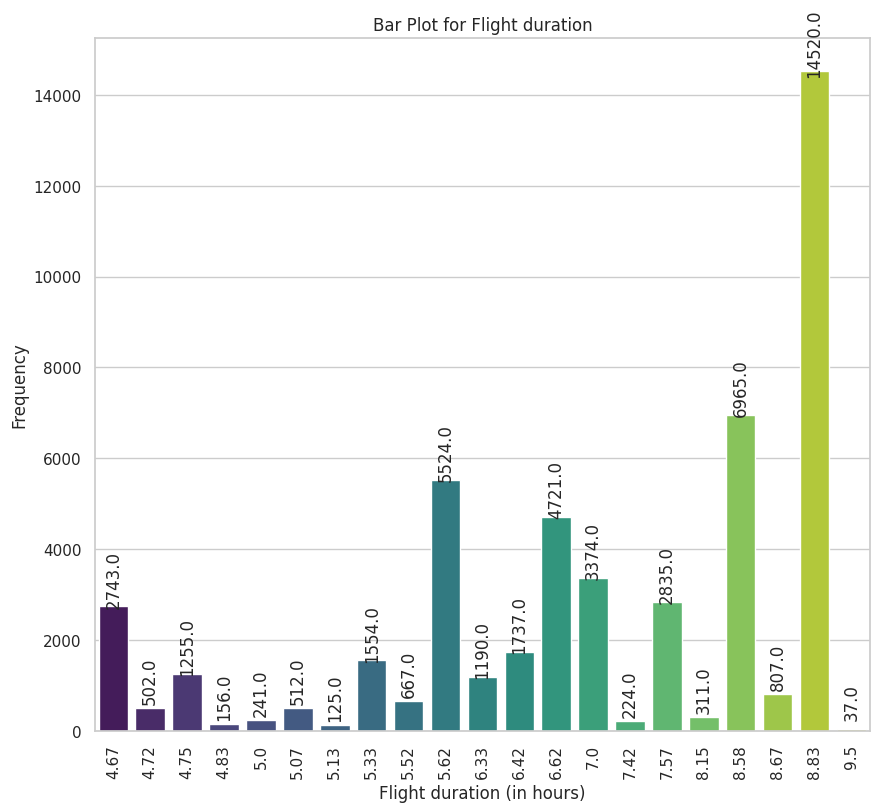

In [43]:
# Get value counts
value_counts = data['flight_duration'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Flight duration', 'Count']


# Set the plot style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='Flight duration', y='Count', data=value_counts, palette="viridis")

# Rotate x-axis tick labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Add text annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', rotation=90)


# Set labels and title
plt.xlabel('Flight duration (in hours)')
plt.ylabel('Frequency')
plt.title('Bar Plot for Flight duration')

# Show the plot
plt.show()

In [44]:
# Create a pie plot
fig = px.pie(value_counts, names='Flight duration', values='Count',
             title='Pie Plot for Flight duration',
             width=800, height=600)

# Show the plot
fig.show()

In [45]:
data.booking_complete.value_counts()

,count
booking_complete,
0,42522
1,7478


In [46]:
# Get value counts
value_counts = data['booking_complete'].value_counts().reset_index()

# Rename columns for clarity
value_counts.columns = ['Booking Complete', 'Count']

# Define different colors for each type
colors = px.colors.qualitative.Plotly[:len(value_counts)]

# Create a bar plot with text annotations and different colors
fig = px.bar(value_counts, x='Booking Complete', y='Count', text='Count',
             labels={'Count': 'Frequency'},
             title='Bar Plot for Booking Complete(0-> No, 1->Yes)',
             color='Booking Complete',
             color_discrete_sequence=colors,  # Specify the color sequence
             width=800, height=500)

# Customize layout
fig.update_layout(showlegend=False)  # Hiding the legend for simplicity

# Customize layout to show all categories on x-axis
fig.update_layout(
    xaxis=dict(tickmode='array', tickvals=value_counts['Booking Complete'], ticktext=value_counts['Booking Complete']),
    showlegend=False
)

# Show the plot
fig.show()

In [47]:
# Create a pie plot
fig = px.pie(value_counts, names='Booking Complete', values='Count',
             title='Pie Plot for Booking Complete(0-> No, 1->Yes)',
             width=800, height=600)

# Show the plot
fig.show()

### 4. LabelEncoding the columns 'sales_channel' and 'trip_type'

In [48]:
data.sales_channel.value_counts()

,count
sales_channel,
Internet,44382
Mobile,5618


In [49]:
data.trip_type.value_counts()

,count
trip_type,
RoundTrip,49497
OneWay,387
CircleTrip,116


In [50]:
data['sales_channel_encoded'] = data['sales_channel'].map({'Internet': 0, 'Mobile': 1})
data.sales_channel_encoded.value_counts()

,count
sales_channel_encoded,
0,44382
1,5618


In [51]:
data['trip_type_encoded'] = data['trip_type'].map({'RoundTrip': 0, 'OneWay': 1, 'CircleTrip':2})
data.trip_type_encoded.value_counts()

,count
trip_type_encoded,
0,49497
1,387
2,116


### 5. Data Modelling

In [52]:
frequency_encoding = data['route'].value_counts(normalize=True)
data['route_encoded'] = data['route'].map(frequency_encoding)

In [53]:
frequency_encoding = data['booking_origin'].value_counts(normalize=True)
data['booking_origin_encoded'] = data['booking_origin'].map(frequency_encoding)

In [54]:
selected_columns = ['sales_channel', 'trip_type', 'flight_day', 'route' , 'booking_origin']
ml_data = data.drop(columns=selected_columns)

In [55]:
ml_data

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_day_num,sales_channel_encoded,trip_type_encoded,route_encoded,booking_origin_encoded
0,2,262,19,7,1,0,0,5.52,0,6,0,0,0.00040,0.02148
1,1,112,20,3,0,0,0,5.52,0,6,0,0,0.00040,0.02148
2,2,243,22,17,1,1,0,5.52,0,3,0,0,0.00040,0.02540
3,1,96,31,4,0,0,1,5.52,0,6,0,0,0.00040,0.02148
4,2,68,22,15,1,0,1,5.52,0,3,0,0,0.00040,0.02540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,1,0,1,5.62,0,6,0,0,0.00442,0.35744
49996,1,111,6,4,0,0,0,5.62,0,7,0,0,0.00442,0.35744
49997,1,24,6,22,0,0,1,5.62,0,6,0,0,0.00442,0.35744
49998,1,15,6,11,1,0,1,5.62,0,1,0,0,0.00442,0.35744


In [56]:
ml_data.to_csv('Cleaned and Encoded British Airways Data.csv', index=False)

### 6. Preparing Data for Training and Testing purposes

In [57]:
x = ml_data.drop('booking_complete', axis=1)
y = ml_data['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### 7. Training and Testing Data using Regression Models

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming x and y are already defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Dictionary to store model names and their corresponding classes
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42)
}

# Dictionary to store evaluation metrics
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {"MSE": mse, "R² Score": r2}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Display the results
print("Classification Table for Regression Models:")
print(results_df)

Classification Table for Regression Models:
                                  MSE  R² Score
Linear Regression            0.120209  0.045262
Random Forest Regressor      0.112480  0.106648
Ridge Regression             0.120202  0.045320
Lasso Regression             0.125915 -0.000054
ElasticNet Regression        0.125859  0.000388
Gradient Boosting Regressor  0.111325  0.115824
XGBoost Regressor            0.112443  0.106941


Training and Testing using Linear Regression...
Linear Regression MSE: 0.1202, R² Score: 0.0453


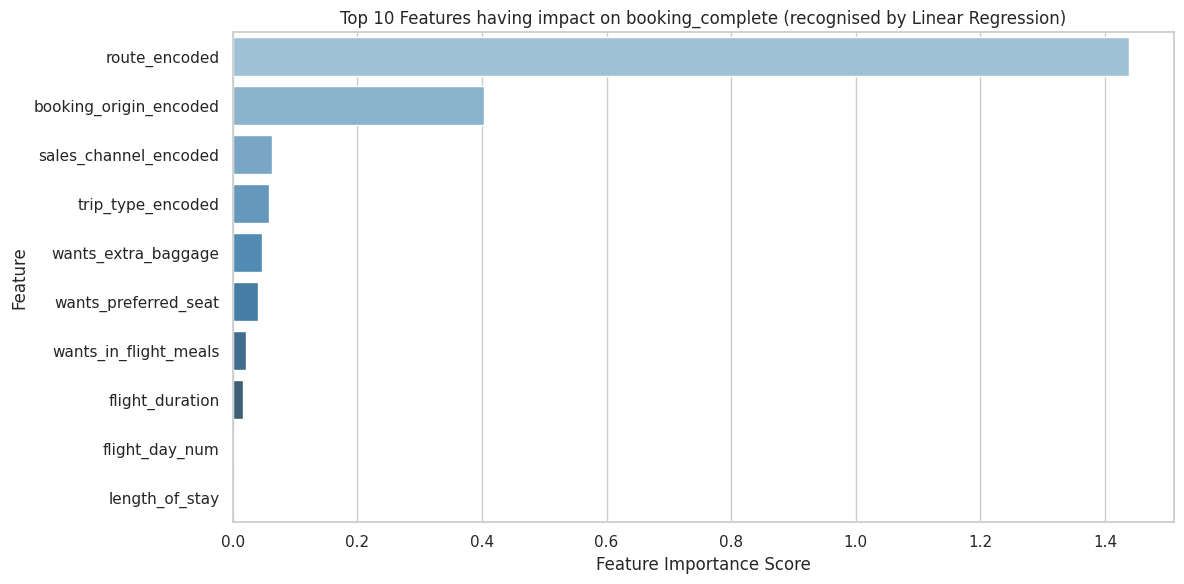

Training and Testing using Random Forest Regressor...
Random Forest Regressor MSE: 0.1125, R² Score: 0.1066


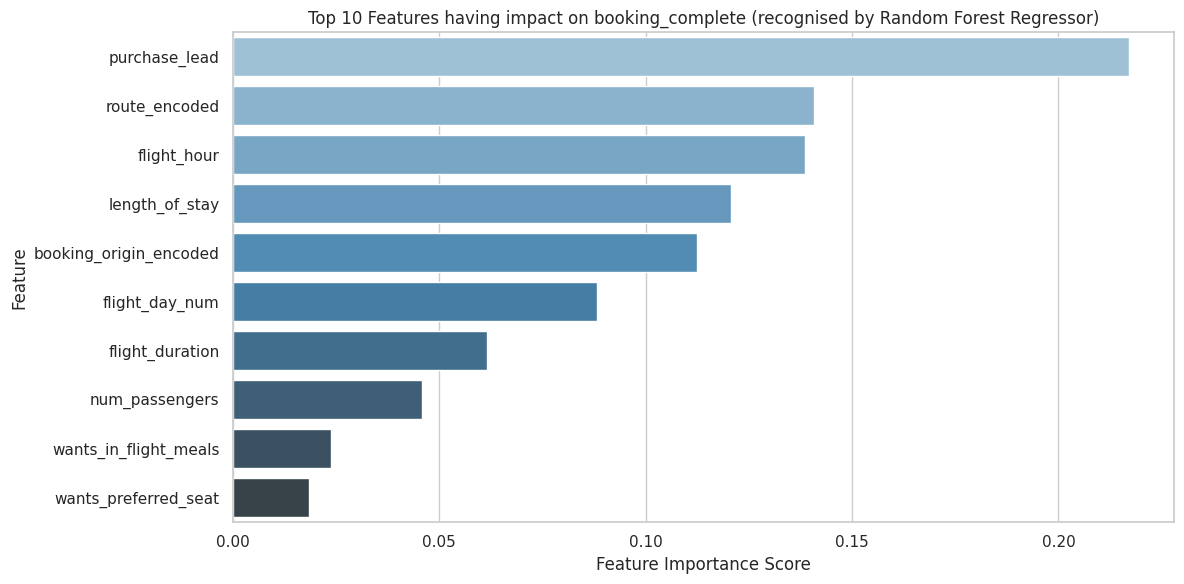

Training and Testing using Ridge Regression...
Ridge Regression MSE: 0.1202, R² Score: 0.0453


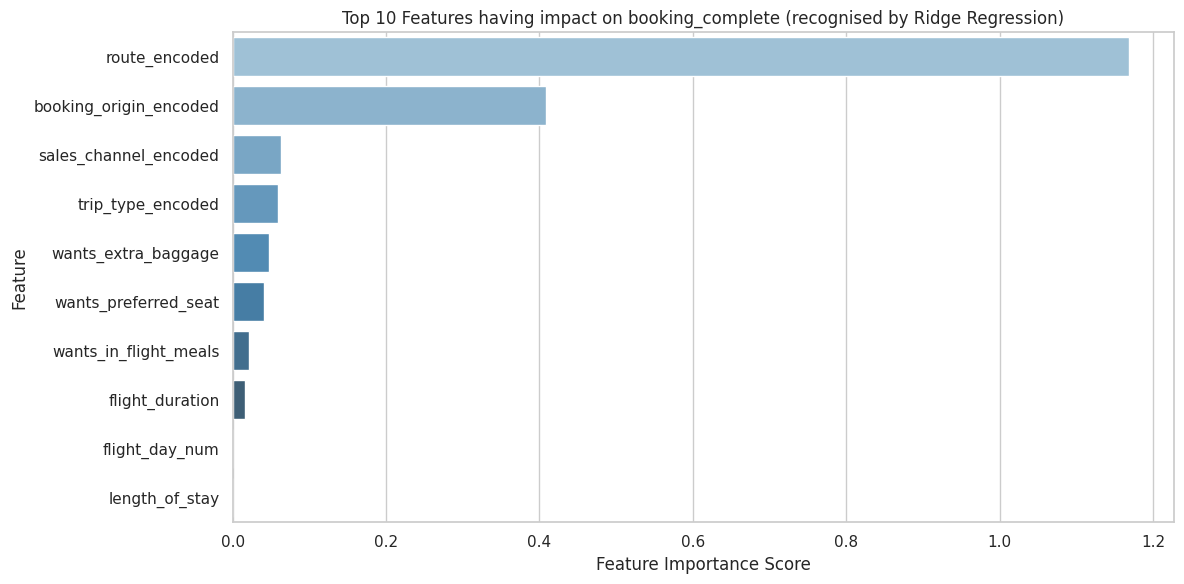

Training and Testing using Lasso Regression...
Lasso Regression MSE: 0.1259, R² Score: -0.0001


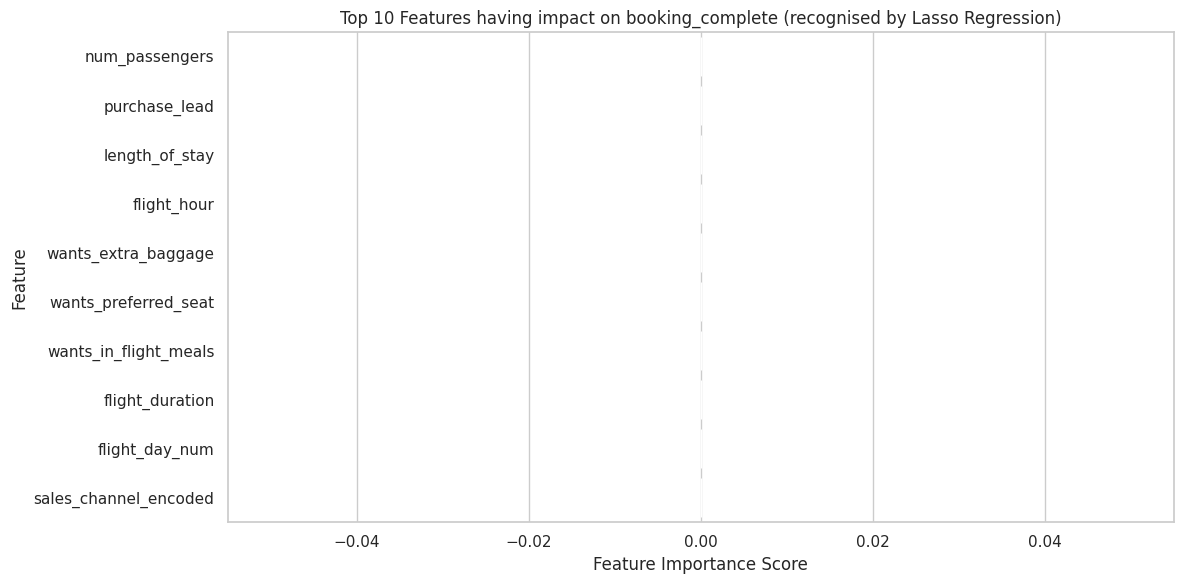

Training and Testing using ElasticNet Regression...
ElasticNet Regression MSE: 0.1259, R² Score: 0.0004


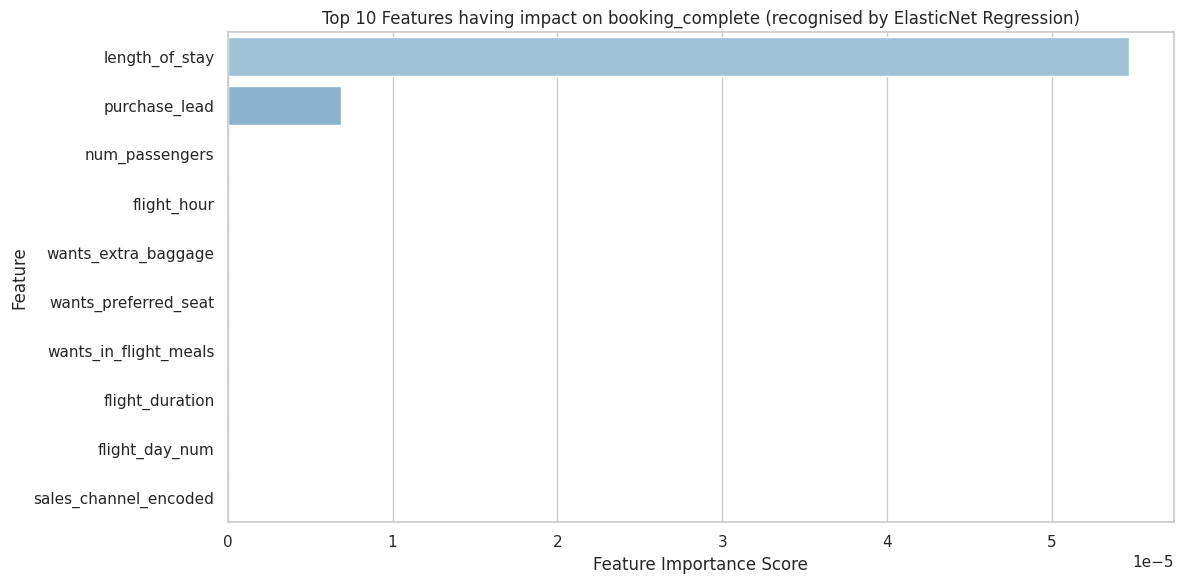

Training and Testing using Gradient Boosting Regressor...
Gradient Boosting Regressor MSE: 0.1113, R² Score: 0.1158


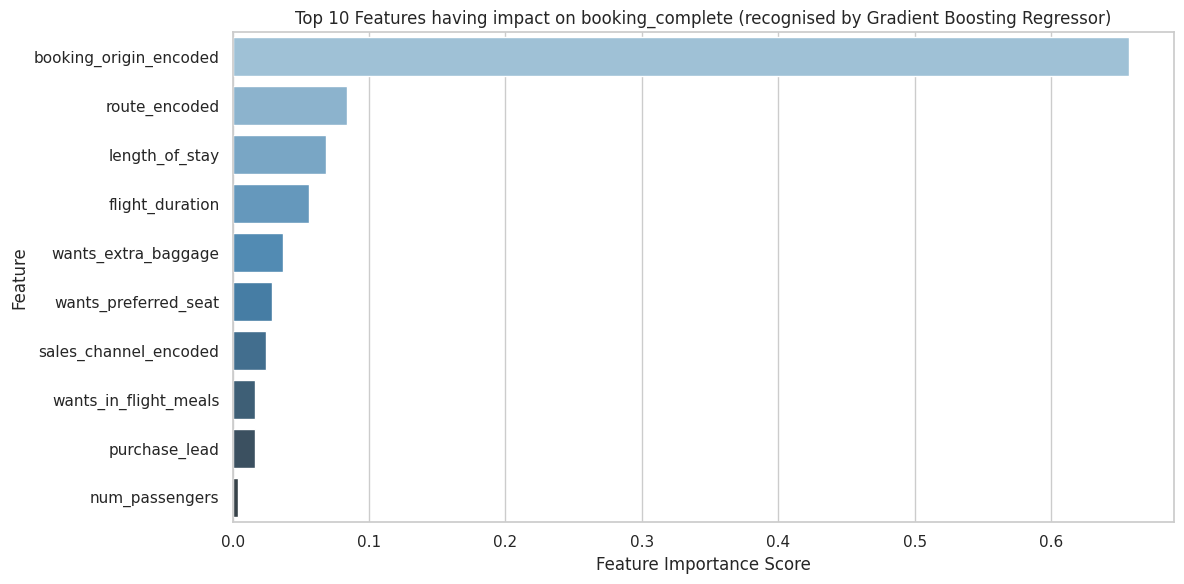

Training and Testing using XGBoost Regressor...
XGBoost Regressor MSE: 0.1124, R² Score: 0.1069


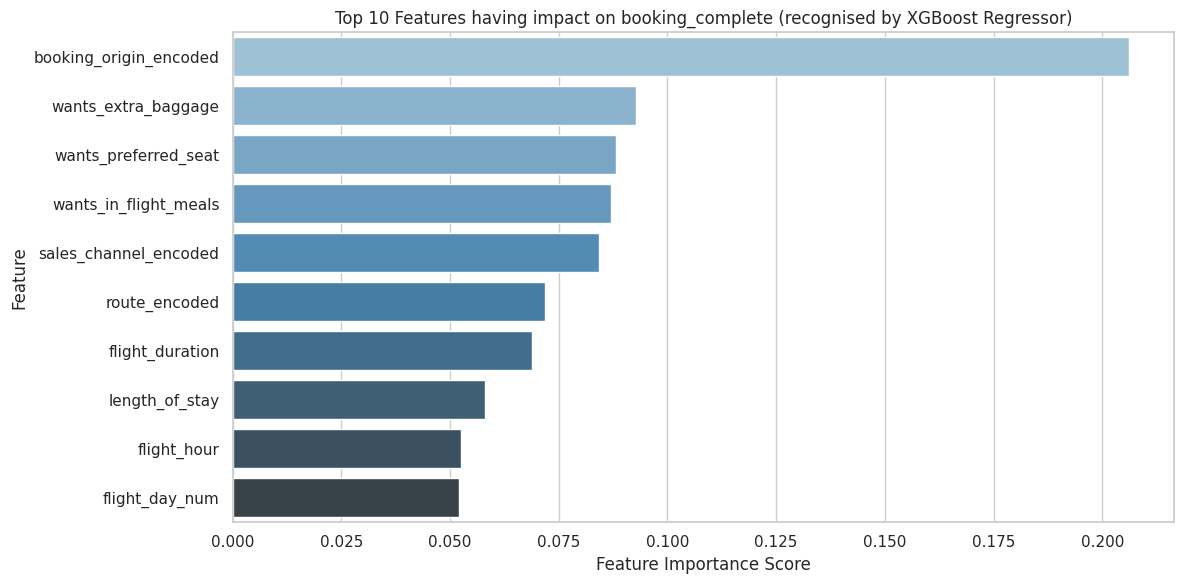

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming x and y are already defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Dictionary to store models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": XGBRegressor(random_state=42)
}

# Function to plot feature importance
def plot_feature_importance(model_name, model, x):
    if model_name == "Linear Regression" or model_name == "Ridge Regression" or \
       model_name == "Lasso Regression" or model_name == "ElasticNet Regression":
        # Use absolute values of coefficients for linear models
        importances = np.abs(model.coef_)
        feature_names = x.columns
    else:
        # Use feature_importances_ for tree-based models
        importances = model.feature_importances_
        feature_names = x.columns

    # Create a DataFrame to sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(10)

    # Plot the top 10 features
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_d")
    plt.title(f"Top 10 Features having impact on booking_complete (recognised by {model_name})")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and Testing using {name}...")

    # Fit the model
    model.fit(x_train, y_train)

    # Predict and calculate metrics
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MSE: {mse:.4f}, R² Score: {r2:.4f}")

    # Plot feature importance
    plot_feature_importance(name, model, x)

### 8. Training and Testing data using Classification Model

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming x and y are already defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Dictionary to store model names and their corresponding classes
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Linear SVM": LinearSVC(max_iter=10000),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and Testing using {name}...")

    # Fit the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {"Accuracy": accuracy}

    # Print classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Display the results in a DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df)

Training and Testing using Decision Tree Classifier...

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12784
           1       0.28      0.30      0.29      2216

    accuracy                           0.78     15000
   macro avg       0.58      0.58      0.58     15000
weighted avg       0.79      0.78      0.78     15000

--------------------------------------------------
Training and Testing using Linear SVM...

Classification Report for Linear SVM:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     12784
           1       0.00      0.00      0.00      2216

    accuracy                           0.85     15000
   macro avg       0.43      0.50      0.46     15000
weighted avg       0.73      0.85      0.78     15000

--------------------------------------------------
Training and Testing using Random Forest Classifier...



Training and Testing using Decision Tree Classifier...
Decision Tree Classifier Accuracy: 0.7830


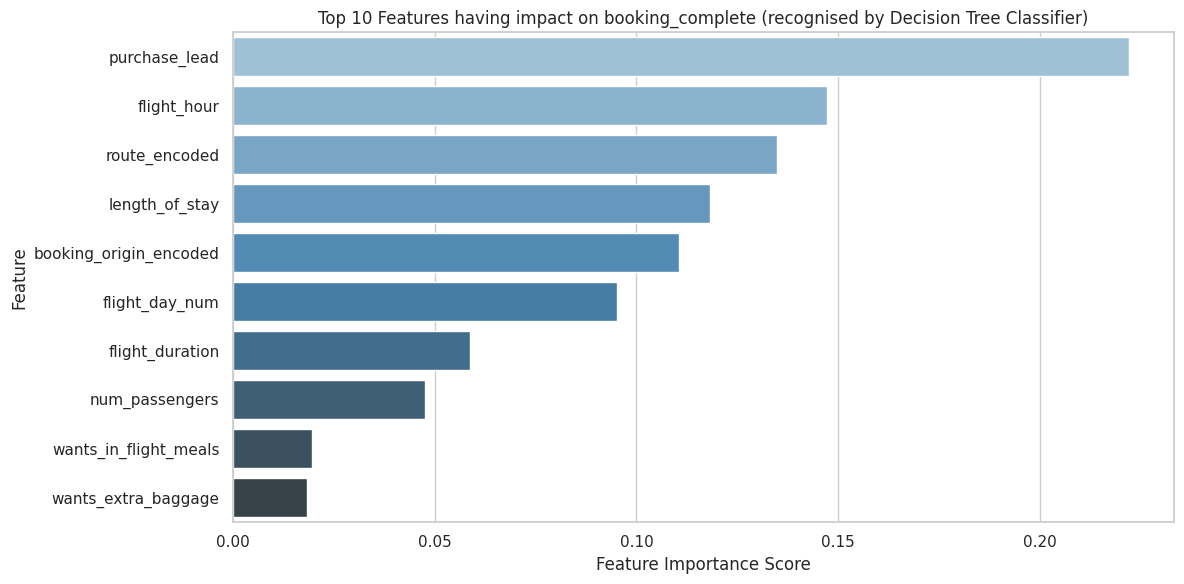

Training and Testing using Linear SVM...
Linear SVM Accuracy: 0.8523


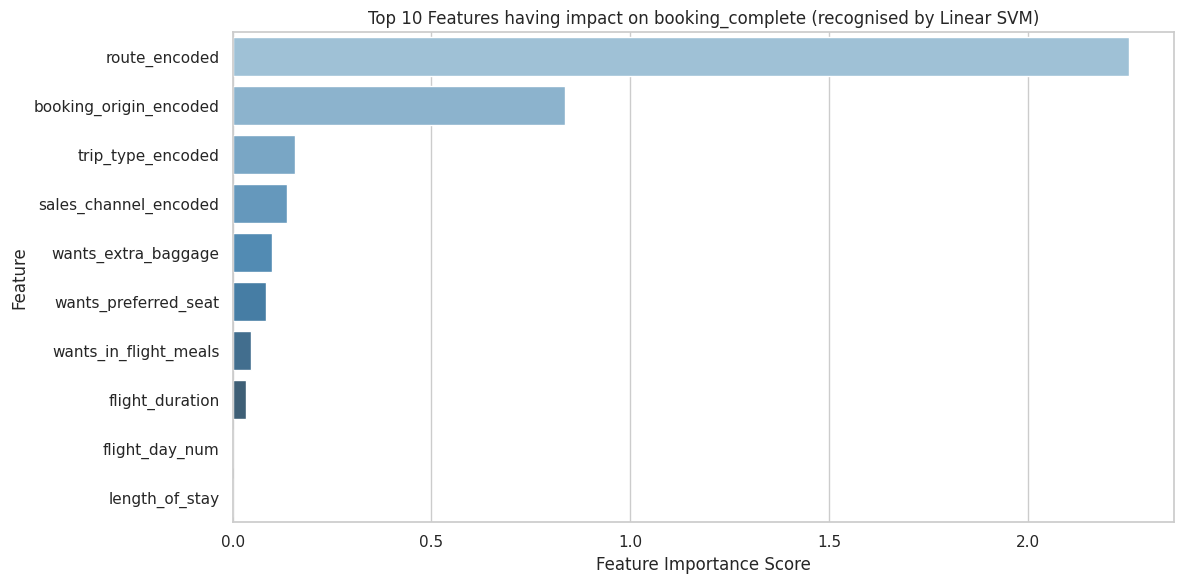

Training and Testing using Random Forest Classifier...
Random Forest Classifier Accuracy: 0.8535


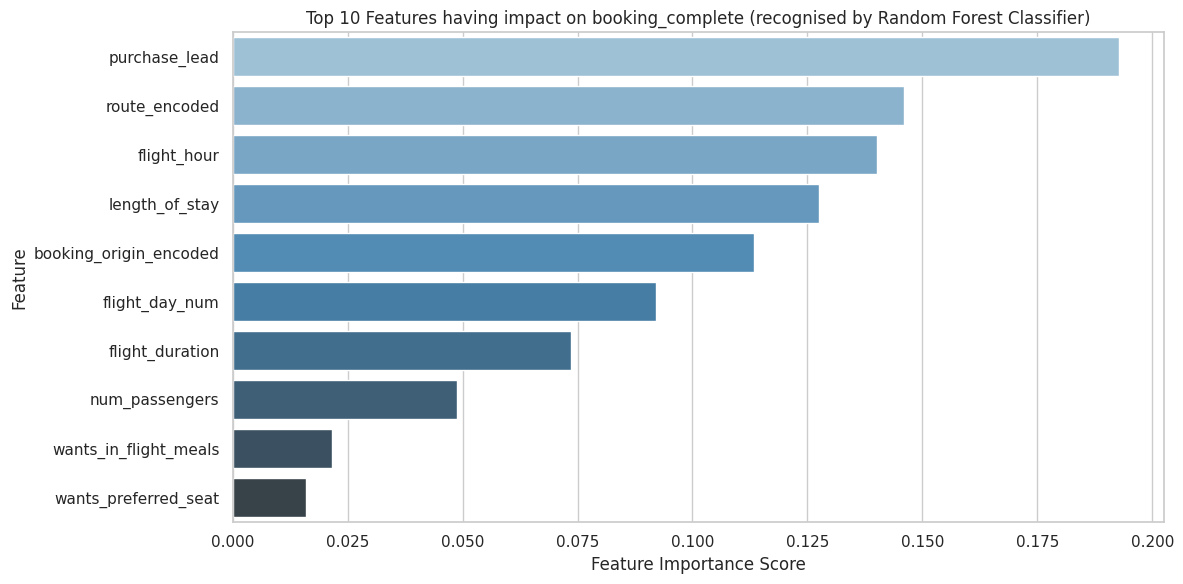

Training and Testing using Logistic Regression...
Logistic Regression Accuracy: 0.8523


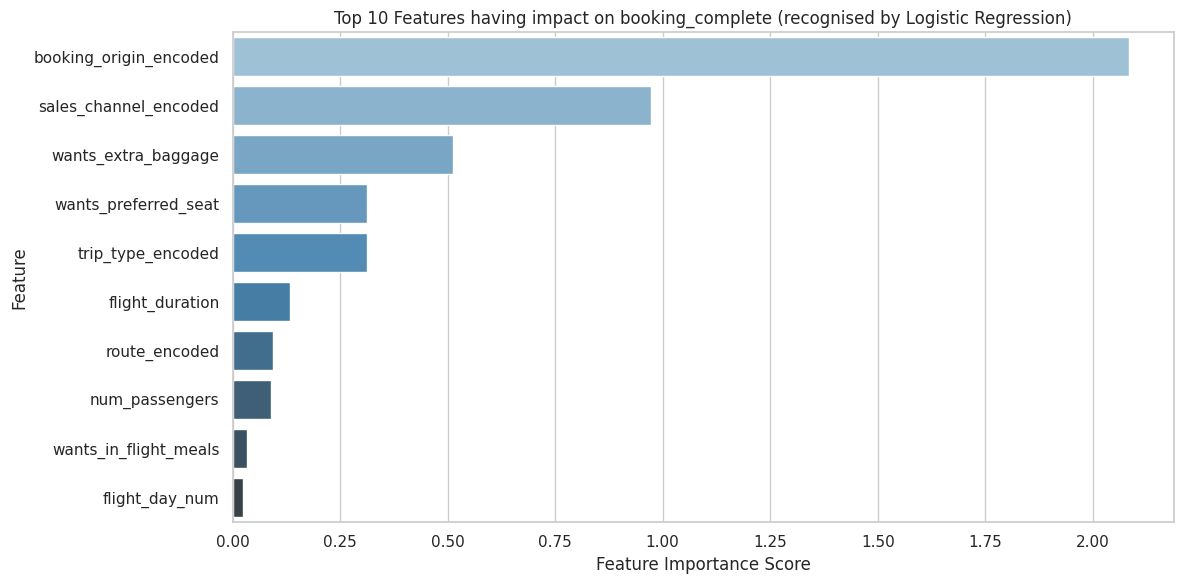

Training and Testing using XGBoost Classifier...
XGBoost Classifier Accuracy: 0.8478


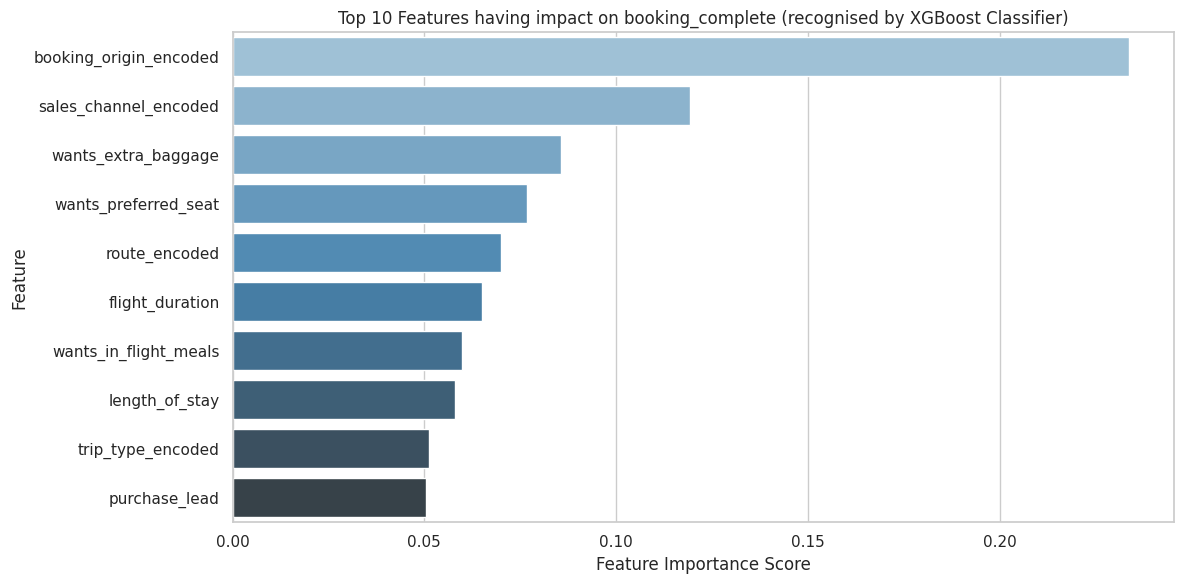

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Assuming x and y are already defined
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Dictionary to store models
models = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Linear SVM": LinearSVC(max_iter=10000),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Function to plot feature importance
def plot_feature_importance(model_name, model, x):
    if model_name == "Linear SVM" or model_name == "Logistic Regression":
        # Use coefficient magnitudes for Logistic Regression and Linear SVM
        importances = np.abs(model.coef_[0])
        feature_names = x.columns
    else:
        # Use feature_importances_ for tree-based models
        importances = model.feature_importances_
        feature_names = x.columns

    # Create a DataFrame to sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(10)

    # Plot the top 10 features
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="Blues_d")
    plt.title(f"Top 10 Features having impact on booking_complete (recognised by {model_name})")
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and Testing using {name}...")

    # Fit the model
    model.fit(x_train, y_train)

    # Predict and calculate accuracy
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    # Plot feature importance
    plot_feature_importance(name, model, x)